In [23]:
# Creating data set
# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]
# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]

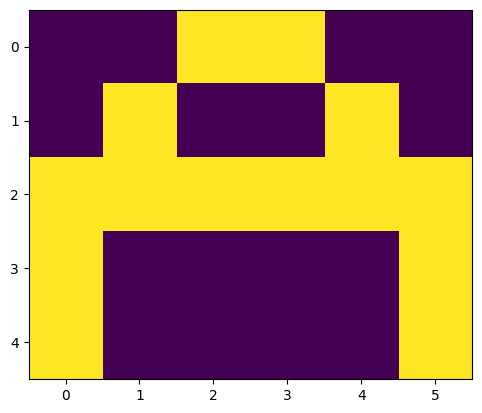

In [24]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()


In [25]:
# converting data and labels into numpy array
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
np.array(c).reshape(1, 30)]
y = np.array(y)
# Printing data and labels
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [26]:
# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Feed-forward neural network
def f_forward(x, w1, w2):
    # Hidden layer
    z1 = x.dot(w1)          # input from layer 1
    a1 = sigmoid(z1)        # output from hidden layer
    z2 = a1.dot(w2)         # input to output layer
    a2 = sigmoid(z2)        # output of network
    return a2

# Initialize weights randomly
def generate_wt(x, y):
    li = []
    for i in range(x * y):
        li.append(np.random.randn())
    return np.array(li).reshape(x, y)

# Mean squared error (MSE) loss
def loss(out, y):
    s = np.square(out - y)
    s = np.sum(s) / len(y)
    return s

# Backpropagation
def back_prop(x, y, w1, w2, alpha):
    # Forward pass
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    # Error in output layer
    d2 = a2 - y
    d1 = np.multiply((w2.dot(d2.T)).T, np.multiply(a1, 1 - a1))

    # Gradients for w1 and w2
    w1_adj = x.T.dot(d1)
    w2_adj = a1.T.dot(d2)

    # Update weights
    w1 = w1 - alpha * w1_adj
    w2 = w2 - alpha * w2_adj

    return w1, w2


In [27]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[-5.20787062e-01  1.35936794e+00 -6.33208308e-01 -4.55566874e-01
  -2.15856699e-01]
 [ 7.54630209e-01  7.72697474e-01 -5.73635566e-01  2.49259372e-01
   2.05400496e-01]
 [-1.14426172e-02 -1.02458652e+00 -1.92243815e+00 -1.88295042e+00
  -3.57073867e-01]
 [-9.49009314e-01 -1.45071997e+00  4.39400989e-01  1.95674927e-01
   1.82931686e-01]
 [ 3.67313866e-01 -5.28914295e-01 -5.69963743e-01 -7.64801538e-01
  -1.08323899e-01]
 [-4.51502409e-01 -2.26822759e-01  1.58894727e+00 -1.08770350e+00
   7.23994263e-01]
 [-1.31375825e-01 -1.79873451e+00  3.33591681e-01 -1.82733069e+00
  -1.07558870e+00]
 [-7.03972137e-01  1.95459239e-01  1.81296013e-02  2.31944590e-01
  -6.08826768e-01]
 [ 2.78515259e+00 -7.76265847e-01  2.26749437e+00  1.04606968e+00
   2.36014250e-01]
 [-1.66277689e+00 -1.94952313e-01 -6.12284123e-01  1.34999062e-01
  -3.39229540e-01]
 [ 7.20300746e-01 -3.50980388e-02 -3.27843003e-01  1.54356441e-02
  -6.99170528e-01]
 [-1.36545405e+00 -8.79311191e-01  4.95016605e-01 -5.23690806e-01

In [28]:
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
    acc = []
    losss = []
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss(out, Y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("epochs:", j + 1, "======== acc:", (1 - (sum(l) / len(x))) * 100)
        acc.append((1 - (sum(l) / len(x))) * 100)
        losss.append(sum(l) / len(x))
    return (acc, losss, w1, w2)

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)


epochs: 1 ======== acc: 73.7733297709669
epochs: 2 ======== acc: 74.71203318117662
epochs: 3 ======== acc: 75.64960350150012
epochs: 4 ======== acc: 76.57590058607539
epochs: 5 ======== acc: 77.47811789776257
epochs: 6 ======== acc: 78.34435276863822
epochs: 7 ======== acc: 79.1669747220044
epochs: 8 ======== acc: 79.94374766893758
epochs: 9 ======== acc: 80.67651736125505
epochs: 10 ======== acc: 81.36903728594588
epochs: 11 ======== acc: 82.02535470835035
epochs: 12 ======== acc: 82.64907570749664
epochs: 13 ======== acc: 83.24318904729554
epochs: 14 ======== acc: 83.81009225650348
epochs: 15 ======== acc: 84.35162594980005
epochs: 16 ======== acc: 84.869058002838
epochs: 17 ======== acc: 85.36303635023448
epochs: 18 ======== acc: 85.83356981693598
epochs: 19 ======== acc: 86.28010991511246
epochs: 20 ======== acc: 86.70178315285216
epochs: 21 ======== acc: 87.09775611144288
epochs: 22 ======== acc: 87.46763060091094
epochs: 23 ======== acc: 87.8117246041958
epochs: 24 ======== acc: 

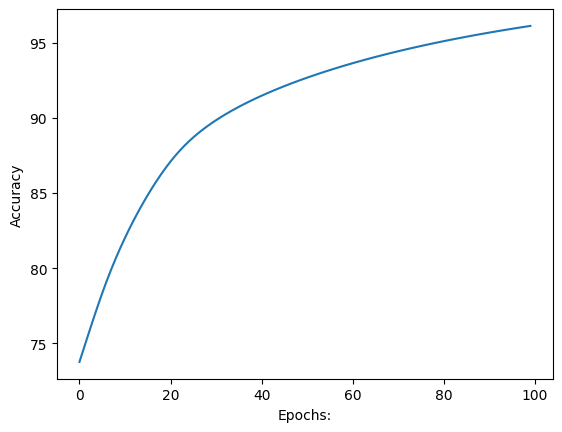

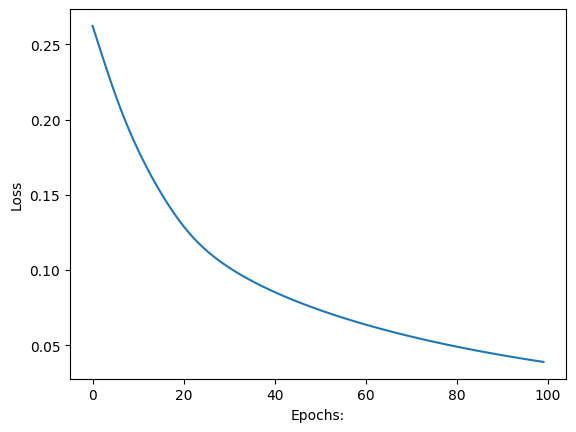

In [29]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

Image is of letter B.


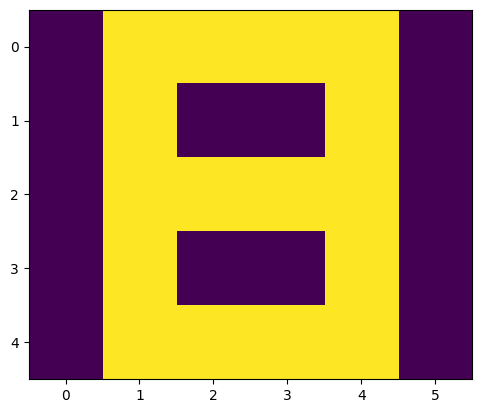

In [30]:
def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(Out[0])):
        if maxm < Out[0][i]:
            maxm = Out[0][i]
            k = i

    if k == 0:
        print("Image is of letter A.")
    elif k == 1:
        print("Image is of letter B.")
    else:
        print("Image is of letter C.")

    plt.imshow(x.reshape(5, 6))
    plt.show()


# Example: Predicting for letter 'B'
predict(x[1], w1, w2)


Điều này cho thấy mô hình đã phân loại đúng ảnh chữ B, tức là đã học được đặc trưng cơ bản để phân biệt giữa ba ký tự A, B và C. Quá trình dự đoán được thực hiện đúng quy trình: dữ liệu đầu vào được lan truyền qua các lớp ẩn, tính toán đầu ra, chọn giá trị xác suất cao nhất và hiển thị kết quả dự đoán cùng hình ảnh tương ứng.
Tuy nhiên, do tập dữ liệu huấn luyện rất nhỏ (chỉ gồm 3 mẫu) và mạng có kiến trúc đơn giản, kết quả đúng này chỉ mang tính minh họa, chưa phản ánh được khả năng tổng quát hóa của mô hình. Nếu áp dụng với dữ liệu thực tế hoặc các biến thể của chữ viết tay, độ chính xác có thể giảm đáng kể.
Để cải thiện, có thể mở rộng tập dữ liệu, tăng số lượng lớp và số neuron, đồng thời thử nghiệm với các mô hình học sâu chuyên dụng cho ảnh như CNN (Convolutional Neural Network).
